In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
import os
import matplotlib.pyplot as plt
import torch

In [2]:
!git clone https://github.com/LucaIanniello/MLIAProject.git

Cloning into 'MLIAProject'...
remote: Enumerating objects: 359, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 359 (delta 5), reused 14 (delta 3), pack-reused 337 (from 1)
Receiving objects: 100% (359/359), 90.97 MiB | 32.11 MiB/s, done.
Resolving deltas: 100% (149/149), done.


In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

!conda env create -f MLIAProject/CLAM/env.yml
!conda install -n clam_latest -c conda-forge openslide
!conda install -n clam_latest -c conda-forge openslide-tools libopenslide0 libtiff-dev libjpeg-dev
!conda install -n clam_latest -c conda-forge future
!conda run -n clam_latest python --version
!conda run -n clam_latest pip list

!apt-get update
!apt-get install -y openslide-tools libopenslide0 libtiff-dev libjpeg-dev

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



python-3.10.0        | 29.8 MB   | :   0% 0/1 [00:00<?, ?it/s]
tk-8.6.13            | 3.1 MB    | :   0% 0/1 [00:00<?, ?it/s]

openssl-3.5.0        | 3.0 MB    | :   0% 0/1 [00:00<?, ?it/s]


pip-25.1.1           | 1.2 MB    | :   0% 0/1 [00:00<?, ?it/s]



libsqlite-3.50.1     | 898 KB    | :   0% 0/1 [00:00<?, ?it/s]




sqlite-3.50.1        | 878 KB    | :   0% 0/1 [00:00<?, ?it/s]





ncurses-6.5          | 871 KB    | :   0% 0/1 [00:00<?, ?it/s]






libgcc-15.1.0     

In [1]:

!conda --version
!which conda
!conda config --show-sources
!conda env update -n base -f MLIAProject/CLAM/env.yml


conda 24.11.2
/usr/local/bin/conda
==> /usr/local/.condarc <==
channels:
  - conda-forge
always_yes: True

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ failed

SpecsConfigurationConflictError: Requested specs conflict with configured specs.
  requested specs: 
    - pip
    - python==3.10
  pinned specs: 
    - cuda-version=12
    - python=3.11
    - python_abi=3.11[build=*cp311*]
Use 'conda config --show-sources' to look for 'pinned_specs' and 'track_features'
configuration parameters.  Pinned specs may also be defined in the file
/usr/local/conda-meta/pinned.




In [2]:
import os
import zipfile

# URL for the dataset
url = "https://zenodo.org/records/15547611/files/datasetUnified_PT.zip?download=1"

# Download the file using wget
!wget -O /content/Train.zip "$url"

# Define the extraction path
extract_path = './'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile('./Train.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the contents of the extracted folder
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)


--2025-06-14 07:41:33--  https://zenodo.org/records/15547611/files/datasetUnified_PT.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.43.25, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2005901570 (1.9G) [application/octet-stream]
Saving to: ‘/content/Train.zip’

/content/Train.zip  100%[===================>]   1.87G  18.7MB/s    in 1m 56s  

2025-06-14 07:43:29 (16.5 MB/s) - ‘/content/Train.zip’ saved [2005901570/2005901570]

Extracted files: ['.config', 'condacolab_install.log', 'Train.zip', 'MLIAProject', 'results_features', 'sample_data']


22


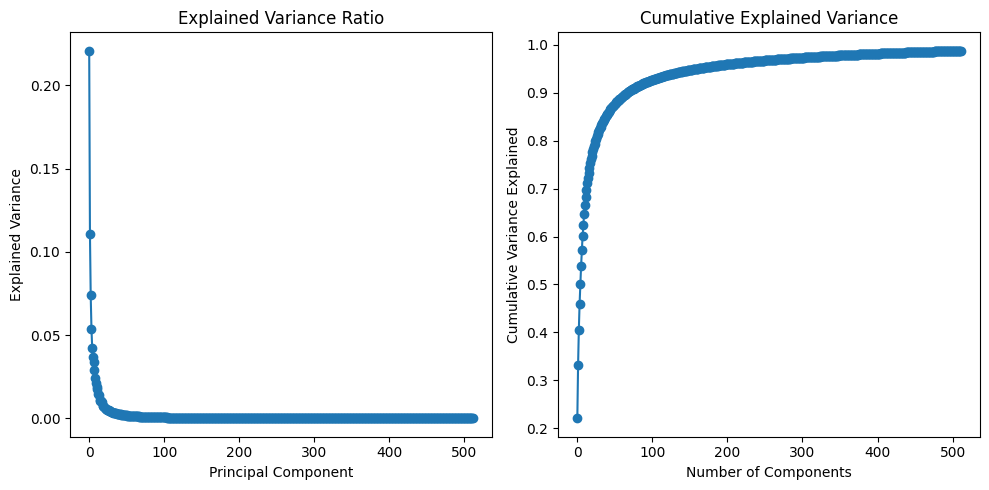

In [3]:
## PCA TO REDUCE DIMENSIONALITY
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import torch
import os

# Load all features
feature_dir = '/content/results_features/pt_files'
features = []

for fname in os.listdir(feature_dir):
    if fname.endswith('.pt'):
        data = torch.load(os.path.join(feature_dir, fname))
        features.append(data.numpy())

print(len(features))

all_features = np.vstack(features)

# Fit PCA
pca = PCA(n_components=min(512, all_features.shape[1]))
pca.fit(all_features)

# Plot explained variance
plt.figure(figsize=(10, 5))

# 1. Explained variance per component
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")

# 2. Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")

plt.tight_layout()
plt.show()


In [4]:
import os
import numpy as np
import torch
from sklearn.decomposition import PCA
from tqdm import tqdm

# Set paths
input_dir = '/content/results_features/pt_files'         # original features
output_dir = '/content/results_features_pca100/pt_files' # reduced features
os.makedirs(output_dir, exist_ok=True)

# Collect all features
features = []
file_paths = []

print("Loading features...")
for fname in os.listdir(input_dir):
    if fname.endswith('.pt'):
        fpath = os.path.join(input_dir, fname)
        data = torch.load(fpath)
        features.append(data.numpy())
        file_paths.append(fname)

features = np.vstack(features)

# Apply PCA
print("Fitting PCA...")
pca = PCA(n_components=100)
pca.fit(features)

# Transform and save
print("Transforming and saving reduced features...")
start = 0
for i, fname in tqdm(enumerate(file_paths), total=len(file_paths)):
    original = torch.load(os.path.join(input_dir, fname)).numpy()
    reduced = pca.transform(original)
    torch.save(torch.tensor(reduced), os.path.join(output_dir, fname))

print(f"Saved PCA-reduced features to: {output_dir}")



Loading features...
Fitting PCA...
Transforming and saving reduced features...


100%|██████████| 22/22 [00:02<00:00,  9.12it/s]

Saved PCA-reduced features to: /content/results_features_pca100/pt_files


In [5]:
import shutil
import os

original_dir = '/content/results_features'
pca_dir = '/content/results_features_pca100'

for fname in os.listdir(original_dir):
    if fname.endswith('.h5'):
        shutil.copy(os.path.join(original_dir, fname), os.path.join(pca_dir, fname))

print("Copied .h5 files to PCA directory.")


Copied .h5 files to PCA directory.


In [6]:
!MPLBACKEND=Agg conda run -n clam_latest python MLIAProject/CLAM/create_splits_seq.py --task MLIA_Project --seed 1 --k 1 --val_frac 0.2 --test_frac 0.2

label column: label
label dictionary: {'B': 0, 'S': 1, 'E': 2}
number of classes: 3
slide-level counts:  
 label
0    9
1    5
2    8
Name: count, dtype: int64
Patient-LVL; Number of samples registered in class 0: 9
Slide-LVL; Number of samples registered in class 0: 9
Patient-LVL; Number of samples registered in class 1: 5
Slide-LVL; Number of samples registered in class 1: 5
Patient-LVL; Number of samples registered in class 2: 8
Slide-LVL; Number of samples registered in class 2: 8

number of training samples: 12
number of samples in cls 0: 5
number of samples in cls 1: 3
number of samples in cls 2: 4

number of val samples: 5
number of samples in cls 0: 2
number of samples in cls 1: 1
number of samples in cls 2: 2

number of test samples: 5
number of samples in cls 0: 2
number of samples in cls 1: 1
number of samples in cls 2: 2





In [7]:
!MPLBACKEND=Agg CUDA_VISIBLE_DEVICES=0 conda run -n clam_latest python MLIAProject/CLAM/main.py --max_epoch 300 --drop_out 0.25 --lr 1e-4 --k 1 --exp_code MLIA_CLAM_50 --weighted_sample --bag_loss ce --inst_loss svm --task MLIA_Project --model_type clam_sb --log_data --subtyping --data_root_dir /content/results_features_pca100 --embed_dim 100


Load Dataset
label column: label
label dictionary: {'B': 0, 'S': 1, 'E': 2}
number of classes: 3
slide-level counts:  
 label
0    9
1    5
2    8
Name: count, dtype: int64
Patient-LVL; Number of samples registered in class 0: 9
Slide-LVL; Number of samples registered in class 0: 9
Patient-LVL; Number of samples registered in class 1: 5
Slide-LVL; Number of samples registered in class 1: 5
Patient-LVL; Number of samples registered in class 2: 8
Slide-LVL; Number of samples registered in class 2: 8
split_dir:  splits/MLIA_Project_100
################# Settings ###################
num_splits:  1
k_start:  -1
k_end:  -1
task:  MLIA_Project
max_epochs:  300
results_dir:  ./results
lr:  0.0001
experiment:  MLIA_CLAM_50
reg:  1e-05
label_frac:  1.0
bag_loss:  ce
seed:  1
model_type:  clam_sb
model_size:  small
use_drop_out:  0.25
weighted_sample:  True
opt:  adam
bag_weight:  0.7
inst_loss:  svm
B:  8
split_dir:  splits/MLIA_Project_100

Training Fold 0!

Init train/val/test splits... 
Done

In [8]:
!zip -r result_classifier.zip 'results/'

  adding: results/ (stored 0%)
  adding: results/MLIA_CLAM_50_s1/ (stored 0%)
  adding: results/MLIA_CLAM_50_s1/s_0_checkpoint.pt (deflated 9%)
  adding: results/MLIA_CLAM_50_s1/splits_0.csv (deflated 44%)
  adding: results/MLIA_CLAM_50_s1/experiment_MLIA_CLAM_50.txt (deflated 40%)
  adding: results/MLIA_CLAM_50_s1/summary.csv (deflated 44%)
  adding: results/MLIA_CLAM_50_s1/0/ (stored 0%)
  adding: results/MLIA_CLAM_50_s1/0/events.out.tfevents.1749887149.cf4b0397372d (deflated 75%)
  adding: results/MLIA_CLAM_50_s1/split_0_results.pkl (deflated 55%)


In [10]:
!MPLBACKEND=Agg CUDA_VISIBLE_DEVICES=0 conda run -n clam_latest python MLIAProject/CLAM/eval.py --k 1 --models_exp_code MLIA_CLAM_50_s1 --save_exp_code MLIA_CLAM_eval --task MLIA_Project --model_type clam_sb --results_dir results --data_root_dir  /content/results_features_pca100 --embed_dim 100

Models directory: results/MLIA_CLAM_50_s1
{'task': 'MLIA_Project', 'split': 'test', 'save_dir': './eval_results/EVAL_MLIA_CLAM_eval', 'models_dir': 'results/MLIA_CLAM_50_s1', 'model_type': 'clam_sb', 'drop_out': 0.25, 'model_size': 'small'}
label column: label
label dictionary: {'B': 0, 'S': 1, 'E': 2}
number of classes: 3
slide-level counts:  
 label
0    9
1    5
2    8
Name: count, dtype: int64
Patient-LVL; Number of samples registered in class 0: 9
Slide-LVL; Number of samples registered in class 0: 9
Patient-LVL; Number of samples registered in class 1: 5
Slide-LVL; Number of samples registered in class 1: 5
Patient-LVL; Number of samples registered in class 2: 8
Slide-LVL; Number of samples registered in class 2: 8
Init Model
CLAM_SB(
  (attention_net): Sequential(
    (0): Linear(in_features=100, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): Attn_Net_Gated(
      (attention_a): Sequential(
        (0): Linear(in_features=512, out_f

In [11]:
!zip -r result_evaluation.zip 'eval_results/'

  adding: eval_results/ (stored 0%)
  adding: eval_results/EVAL_MLIA_CLAM_eval/ (stored 0%)
  adding: eval_results/EVAL_MLIA_CLAM_eval/fold_0.csv (deflated 45%)
  adding: eval_results/EVAL_MLIA_CLAM_eval/summary.csv (deflated 35%)
  adding: eval_results/EVAL_MLIA_CLAM_eval/eval_experiment_MLIA_CLAM_eval.txt (deflated 31%)
